# Team Details - 21BCE5715, 21BCE5676
<h1> <center> Implementation of Perceptron </center> </h1>

# Objective:
a) Implement OR function, AND function using Perceptron. (Implement from Scratch)

b) Choose a suitable dataset

  i) Single Layer Perceptron - Binary classifier
  
  ii) Multi-Layer Perceptron for Multi-class classification
  
## a) Implementation of OR and AND function

# Methodology: 
The Python code implements the OR and AND logic gates using a Perceptron model from scratch. The Perceptron class defined in the code includes methods for initializing the model's weights, defining the activation function (a step function in this case), making predictions based on the learned weights, and training the model using the perceptron learning algorithm. The OR gate function creates training data with input-output pairs representing the OR logic gate truth table, while the AND gate function does the same for the AND logic gate. These functions train separate Perceptron models for each logic gate by adjusting the weights based on the error between the predicted and actual outputs during training iterations. By testing the trained models with different input combinations, we can observe how the Perceptron effectively learns to model the behavior of the OR and AND logic gates. This code exemplifies the foundational concept of neural networks, showcasing how a simple Perceptron model can be trained to mimic the behavior of basic logic gates through a process of learning and adjustment of weights.

In [1]:
import numpy as np

# Define the Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.zeros(input_size + 1)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation_function(summation)

    def train(self, training_inputs, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

# Define the OR function
def OR_gate():
    training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    labels = np.array([0, 1, 1, 1])

    perceptron = Perceptron(input_size=2)
    perceptron.train(training_inputs, labels)

    return perceptron

# Define the AND function
def AND_gate():
    training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    labels = np.array([0, 0, 0, 1])

    perceptron = Perceptron(input_size=2)
    perceptron.train(training_inputs, labels)

    return perceptron

# Test the OR gate
or_perceptron = OR_gate()
print("OR Gate:")
print("0 OR 0 =", or_perceptron.predict(np.array([0, 0])))
print("0 OR 1 =", or_perceptron.predict(np.array([0, 1])))
print("1 OR 0 =", or_perceptron.predict(np.array([1, 0])))
print("1 OR 1 =", or_perceptron.predict(np.array([1, 1])))

# Test the AND gate
and_perceptron = AND_gate()
print("\nAND Gate:")
print("0 AND 0 =", and_perceptron.predict(np.array([0, 0])))
print("0 AND 1 =", and_perceptron.predict(np.array([0, 1])))
print("1 AND 0 =", and_perceptron.predict(np.array([1, 0])))
print("1 AND 1 =", and_perceptron.predict(np.array([1, 1])))

OR Gate:
0 OR 0 = 0
0 OR 1 = 1
1 OR 0 = 1
1 OR 1 = 1

AND Gate:
0 AND 0 = 0
0 AND 1 = 0
1 AND 0 = 0
1 AND 1 = 1


## b) Single layer perceptron for binary classifier

# Dataset description

The dataset focuses on binary classification of two categories:

1. Kirmizi Pistachio
2. Siit Pistachio

There are the <b>DEPENDENT</b> variables.

It comprises 16 distinct attributes describing their area, perimeter, roundness, major and minor axes lengths, eccentricity, solidity, convex area, extent, aspect ratio, roundness, compactness, and various shape factors. In total, there are 2168 distinguishable entries in the dataset. The main objective of this dataset is to develop a binary classification model capable of accurately differentiating between the two types of pistachios based on these geometric attributes.


The 16 attributes (columns) are:

1. id: An identifier for each data entry.
2. Area: Area of the pistachio.
3. Perimeter: Perimeter of the pistachio.
4. Major_axis: Length of the major axis.
5. Minor_axis: Length of the minor axis.
6. Eccentricity: Measure of how elongated or stretched the pistachio is.
7. Eqdiasq: Equivalent diameter squared.
8. Solidity: A measure of how solid or compact the pistachio's shape is.
9. Convex_area: Area of the pistachio's convex hull (the smallest convex shape that encloses the pistachio).
10. Extent: A measure of how spread out or filled the area is within the pistachio's boundary.
11. Aspect_Ratio: The ratio of major axis length to minor axis length, indicating the pistachio's elongation.
12. Roundness: Measure of how round or circular the pistachio is.
13. Compactness: Measure of how compact or dense the pistachio is.
14. Shapefactor_1: Shape factor related to the pistachio's geometry.
15. Shapefactor_2: Another shape factor related to the pistachio's geometry.
16. Shapefactor_3: Another shape factor related to the pistachio's geometry.
17. Shapefactor_4: One more shape factor related to the pistachio's geometry.

These are the <b>INDEPENDENT</b> variables

# Exploratory data analysis

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn  as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('pistachio.csv')
df.head(20)

id   Area  Perimeter  Major_axis  Minor_axis  Eccentricity   Eqdiasq  \
0    1  63391  1568.4050    390.3396    236.7461        0.7951  284.0984   
1    2  68358  1942.1870    410.8594    234.7525        0.8207  295.0188   
2    3  73589  1246.5380    452.3630    220.5547        0.8731  306.0987   
3    4  71106  1445.2610    429.5291    216.0765        0.8643  300.8903   
4    5  80087  1251.5240    469.3783    220.9344        0.8823  319.3273   
5    6  52268  1154.1500    383.8558    197.5020        0.8575  257.9723   
6    7  71693  1463.9320    388.2366    252.8200        0.7589  302.1297   
7    8  62240  1898.4500    385.7238    218.1349        0.8247  281.5074   
8    9  64319  2011.2910    435.9127    213.7594        0.8715  286.1704   
9   10  78115  1238.6230    492.3300    204.9987        0.9092  315.3714   
10  11  69391  1930.6180    422.5333    223.0412        0.8493  297.2396   
11  12  67309  2353.4050    451.3162    201.3479        0.8950  292.7464   
12  13  81656  1197.5430    458.7472    237.3117        0.8558  322.4402   
13  14  61725  1387.9430    432.0616    194.6882        0.8927  280.3404   
14  15  81583  1295.3361    479.0619    228.7762        0.8786  322.2960   
15  16  62862  1086.5750    431.9981    188.4041        0.8999  282.9106   
16  17  84537  1181.1530    461.5339    235.7771        0.8597  328.0790   
17  18  89306  1940.1930    483.5113    249.2116        0.8569  337.2061   
18  19  70220  1217.2271    437.8213    214.6285        0.8716  299.0098   
19  20  74843  1158.2020    432.6630    232.6371        0.8431  308.6957   

    Solidity  Covex_area  Extent  Aspect_Ratio  Roundness  Compactness  \
0     0.8665       73160  0.6394        1.6488     0.3238       0.7278   
1     0.8765       77991  0.6772        1.7502     0.2277       0.7181   
2     0.9172       80234  0.7127        2.0510     0.5951       0.6767   
3     0.9589       74153  0.7028        1.9879     0.4278       0.7005   
4     0.9657       82929  0.7459        2.1245     0.6425       0.6803   
5     0.8563       61039  0.5628        1.9436     0.4931       0.6721   
6     0.9156       78304  0.6892        1.5356     0.4204       0.7782   
7     0.8947       69563  0.6727        1.7683     0.2170       0.7298   
8     0.8633       74502  0.6542        2.0393     0.1998       0.6565   
9     0.9616       81236  0.7105        2.4016     0.6398       0.6406   
10    0.8948       77549  0.6310        1.8944     0.2339       0.7035   
11    0.8906       75573  0.6887        2.2415     0.1527       0.6487   
12    0.9164       89104  0.7482        1.9331     0.7155       0.7029   
13    0.9016       68459  0.6710        2.2192     0.4027       0.6488   
14    0.9280       87911  0.6971        2.0940     0.6110       0.6728   
15    0.9662       65062  0.7527        2.2929     0.6691       0.6549   
16    0.9858       85753  0.7674        1.9575     0.7615       0.7108   
17    0.9492       94090  0.7410        1.9402     0.2981       0.6974   
18    0.9267       75771  0.7174        2.0399     0.5956       0.6829   
19    0.9543       78426  0.7205        1.8598     0.7011       0.7135   

    Shapefactor_1  Shapefactor_2  Shapefactor_3  Shapefactor_4  \
0          0.0062         0.0037         0.5297         0.8734   
1          0.0060         0.0034         0.5156         0.9024   
2          0.0061         0.0030         0.4579         0.9391   
3          0.0060         0.0030         0.4907         0.9755   
4          0.0059         0.0028         0.4628         0.9833   
5          0.0073         0.0038         0.4517         0.8778   
6          0.0054         0.0035         0.6056         0.9300   
7          0.0062         0.0035         0.5326         0.9418   
8          0.0068         0.0033         0.4310         0.8789   
9          0.0063         0.0026         0.4103         0.9855   
10         0.0061         0.0032         0.4949         0.9375   
11         0.0067         0.0030         0.4207         0.94

In [3]:
df.shape #get the shape of dataframe created

(2148, 18)

In [4]:
df.isna().sum() #check the number of missing values in each column

id               0
Area             0
Perimeter        0
Major_axis       0
Minor_axis       0
Eccentricity     0
Eqdiasq          0
Solidity         0
Covex_area       0
Extent           0
Aspect_Ratio     0
Roundness        0
Compactness      0
Shapefactor_1    0
Shapefactor_2    0
Shapefactor_3    0
Shapefactor_4    0
Class            0
dtype: int64

In [5]:
columns_to_drop = ['id'] #irrelavent 
df = df.drop(columns_to_drop, axis=1)
df.head(10)

Area  Perimeter  Major_axis  Minor_axis  Eccentricity   Eqdiasq  Solidity  \
0  63391   1568.405    390.3396    236.7461        0.7951  284.0984    0.8665   
1  68358   1942.187    410.8594    234.7525        0.8207  295.0188    0.8765   
2  73589   1246.538    452.3630    220.5547        0.8731  306.0987    0.9172   
3  71106   1445.261    429.5291    216.0765        0.8643  300.8903    0.9589   
4  80087   1251.524    469.3783    220.9344        0.8823  319.3273    0.9657   
5  52268   1154.150    383.8558    197.5020        0.8575  257.9723    0.8563   
6  71693   1463.932    388.2366    252.8200        0.7589  302.1297    0.9156   
7  62240   1898.450    385.7238    218.1349        0.8247  281.5074    0.8947   
8  64319   2011.291    435.9127    213.7594        0.8715  286.1704    0.8633   
9  78115   1238.623    492.3300    204.9987        0.9092  315.3714    0.9616   

   Covex_area  Extent  Aspect_Ratio  Roundness  Compactness  Shapefactor_1  \
0       73160  0.6394        1.6488     0.3238       0.7278         0.0062   
1       77991  0.6772        1.7502     0.2277       0.7181         0.0060   
2       80234  0.7127        2.0510     0.5951       0.6767         0.0061   
3       74153  0.7028        1.9879     0.4278       0.7005         0.0060   
4       82929  0.7459        2.1245     0.6425       0.6803         0.0059   
5       61039  0.5628        1.9436     0.4931       0.6721         0.0073   
6       78304  0.6892        1.5356     0.4204       0.7782         0.0054   
7       69563  0.6727        1.7683     0.2170       0.7298         0.0062   
8       74502  0.6542        2.0393     0.1998       0.6565         0.0068   
9       81236  0.7105        2.4016     0.6398       0.6406         0.0063   

   Shapefactor_2  Shapefactor_3  Shapefactor_4              Class  
0         0.0037         0.5297         0.8734  Kirmizi_Pistachio  
1         0.0034         0.5156         0.9024  Kirmizi_Pistachio  
2         0.0030         0.4579         0.9391  Kirmizi_Pistachio  
3         0.0030         0.4907         0.9755  Kirmizi_Pistachio  
4         0.0028         0.4628         0.9833  Kirmizi_Pistachio  
5         0.0038         0.4517         0.8778  Kirmizi_Pistachio  
6         0.0035         0.6056         0.9300  Kirmizi_Pistachio  
7         0.0035         0.5326         0.9418  Kirmizi_Pistachio  
8         0.0033         0.4310         0.8789  Kirmizi_Pistachio  
9         0.0026         0.4103         0.9855  Kirmizi_Pistachio

In [6]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)
df[categorical].head()

There are 1 categorical variables

The categorical variables are :

 ['Class']


Class
0  Kirmizi_Pistachio
1  Kirmizi_Pistachio
2  Kirmizi_Pistachio
3  Kirmizi_Pistachio
4  Kirmizi_Pistachio

<Axes: xlabel='Class', ylabel='Count'>

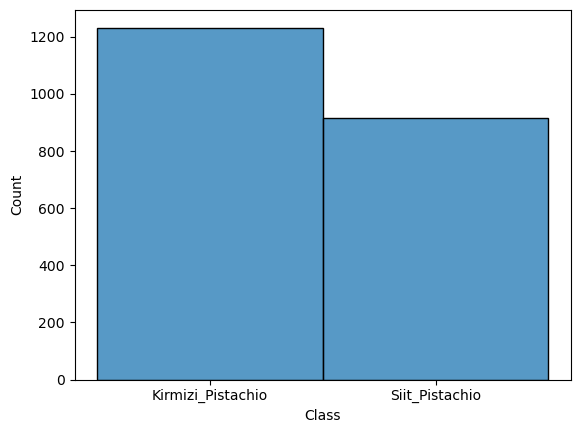

In [7]:
sns.histplot(df['Class'])

### Preprocessing

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])
df.head() # now converted to numberical

Area  Perimeter  Major_axis  Minor_axis  Eccentricity   Eqdiasq  Solidity  \
0  63391   1568.405    390.3396    236.7461        0.7951  284.0984    0.8665   
1  68358   1942.187    410.8594    234.7525        0.8207  295.0188    0.8765   
2  73589   1246.538    452.3630    220.5547        0.8731  306.0987    0.9172   
3  71106   1445.261    429.5291    216.0765        0.8643  300.8903    0.9589   
4  80087   1251.524    469.3783    220.9344        0.8823  319.3273    0.9657   

   Covex_area  Extent  Aspect_Ratio  Roundness  Compactness  Shapefactor_1  \
0       73160  0.6394        1.6488     0.3238       0.7278         0.0062   
1       77991  0.6772        1.7502     0.2277       0.7181         0.0060   
2       80234  0.7127        2.0510     0.5951       0.6767         0.0061   
3       74153  0.7028        1.9879     0.4278       0.7005         0.0060   
4       82929  0.7459        2.1245     0.6425       0.6803         0.0059   

   Shapefactor_2  Shapefactor_3  Shapefactor_4  Class  
0         0.0037         0.5297         0.8734      0  
1         0.0034         0.5156         0.9024      0  
2         0.0030         0.4579         0.9391      0  
3         0.0030         0.4907         0.9755      0  
4         0.0028         0.4628         0.9833      0

In [9]:
df.describe()

Area    Perimeter   Major_axis   Minor_axis  Eccentricity  \
count    2148.000000  2148.000000  2148.000000  2148.000000   2148.000000   
mean    79950.655493  1425.971751   446.248968   238.311842      0.840219   
std     13121.737799   375.565503    32.445304    30.310695      0.048759   
min     29808.000000   858.363000   320.344500   133.509600      0.504900   
25%     71936.750000  1170.996250   426.508750   217.875825      0.817500   
50%     79905.500000  1262.785500   448.574750   236.416350      0.849650   
75%     89030.500000  1607.906250   468.509400   257.760150      0.875200   
max    124008.000000  2755.049100   541.966100   383.046100      0.946000   

           Eqdiasq     Solidity     Covex_area       Extent  Aspect_Ratio  \
count  2148.000000  2148.000000    2148.000000  2148.000000   2148.000000   
mean    317.919173     0.940093   85015.839851     0.716067      1.898154   
std      26.908600     0.050452   13154.919327     0.052532      0.240100   
min     194.814600     0.588000   37935.000000     0.427200      1.158500   
25%     302.642850     0.919850   76467.000000     0.687000      1.736375   
50%     318.965300     0.954150   85075.500000     0.726500      1.896250   
75%     336.685525     0.976925   93893.500000     0.753600      2.067025   
max     397.356100     0.995100  132478.000000     0.820400      3.085800   

         Roundness  Compactness  Shapefactor_1  Shapefactor_2  Shapefactor_3  \
count  2148.000000  2148.000000    2148.000000    2148.000000    2148.000000   
mean      0.569172     0.713077       0.005701       0.003017       0.510461   
std       0.212760     0.044547       0.000817       0.000340       0.063942   
min       0.062800     0.476000       0.004000       0.002400       0.226600   
25%       0.371250     0.681550       0.005200       0.002800       0.464475   
50%       0.643400     0.710700       0.005600       0.003000       0.505150   
75%       0.744125     0.741650       0.006100       0.003200       0.550075   
max       0.933600     0.877900       0.013100       0.005300       0.770600   

       Shapefactor_4        Class  
count    2148.000000  2148.000000  
mean        0.955239     0.426443  
std         0.051840     0.494675  
min         0.620400     0.000000  
25%         0.944000     0.000000  
50%         0.973100     0.000000  
75%         0.987300     1.000000  
max         0.999000     1.000000

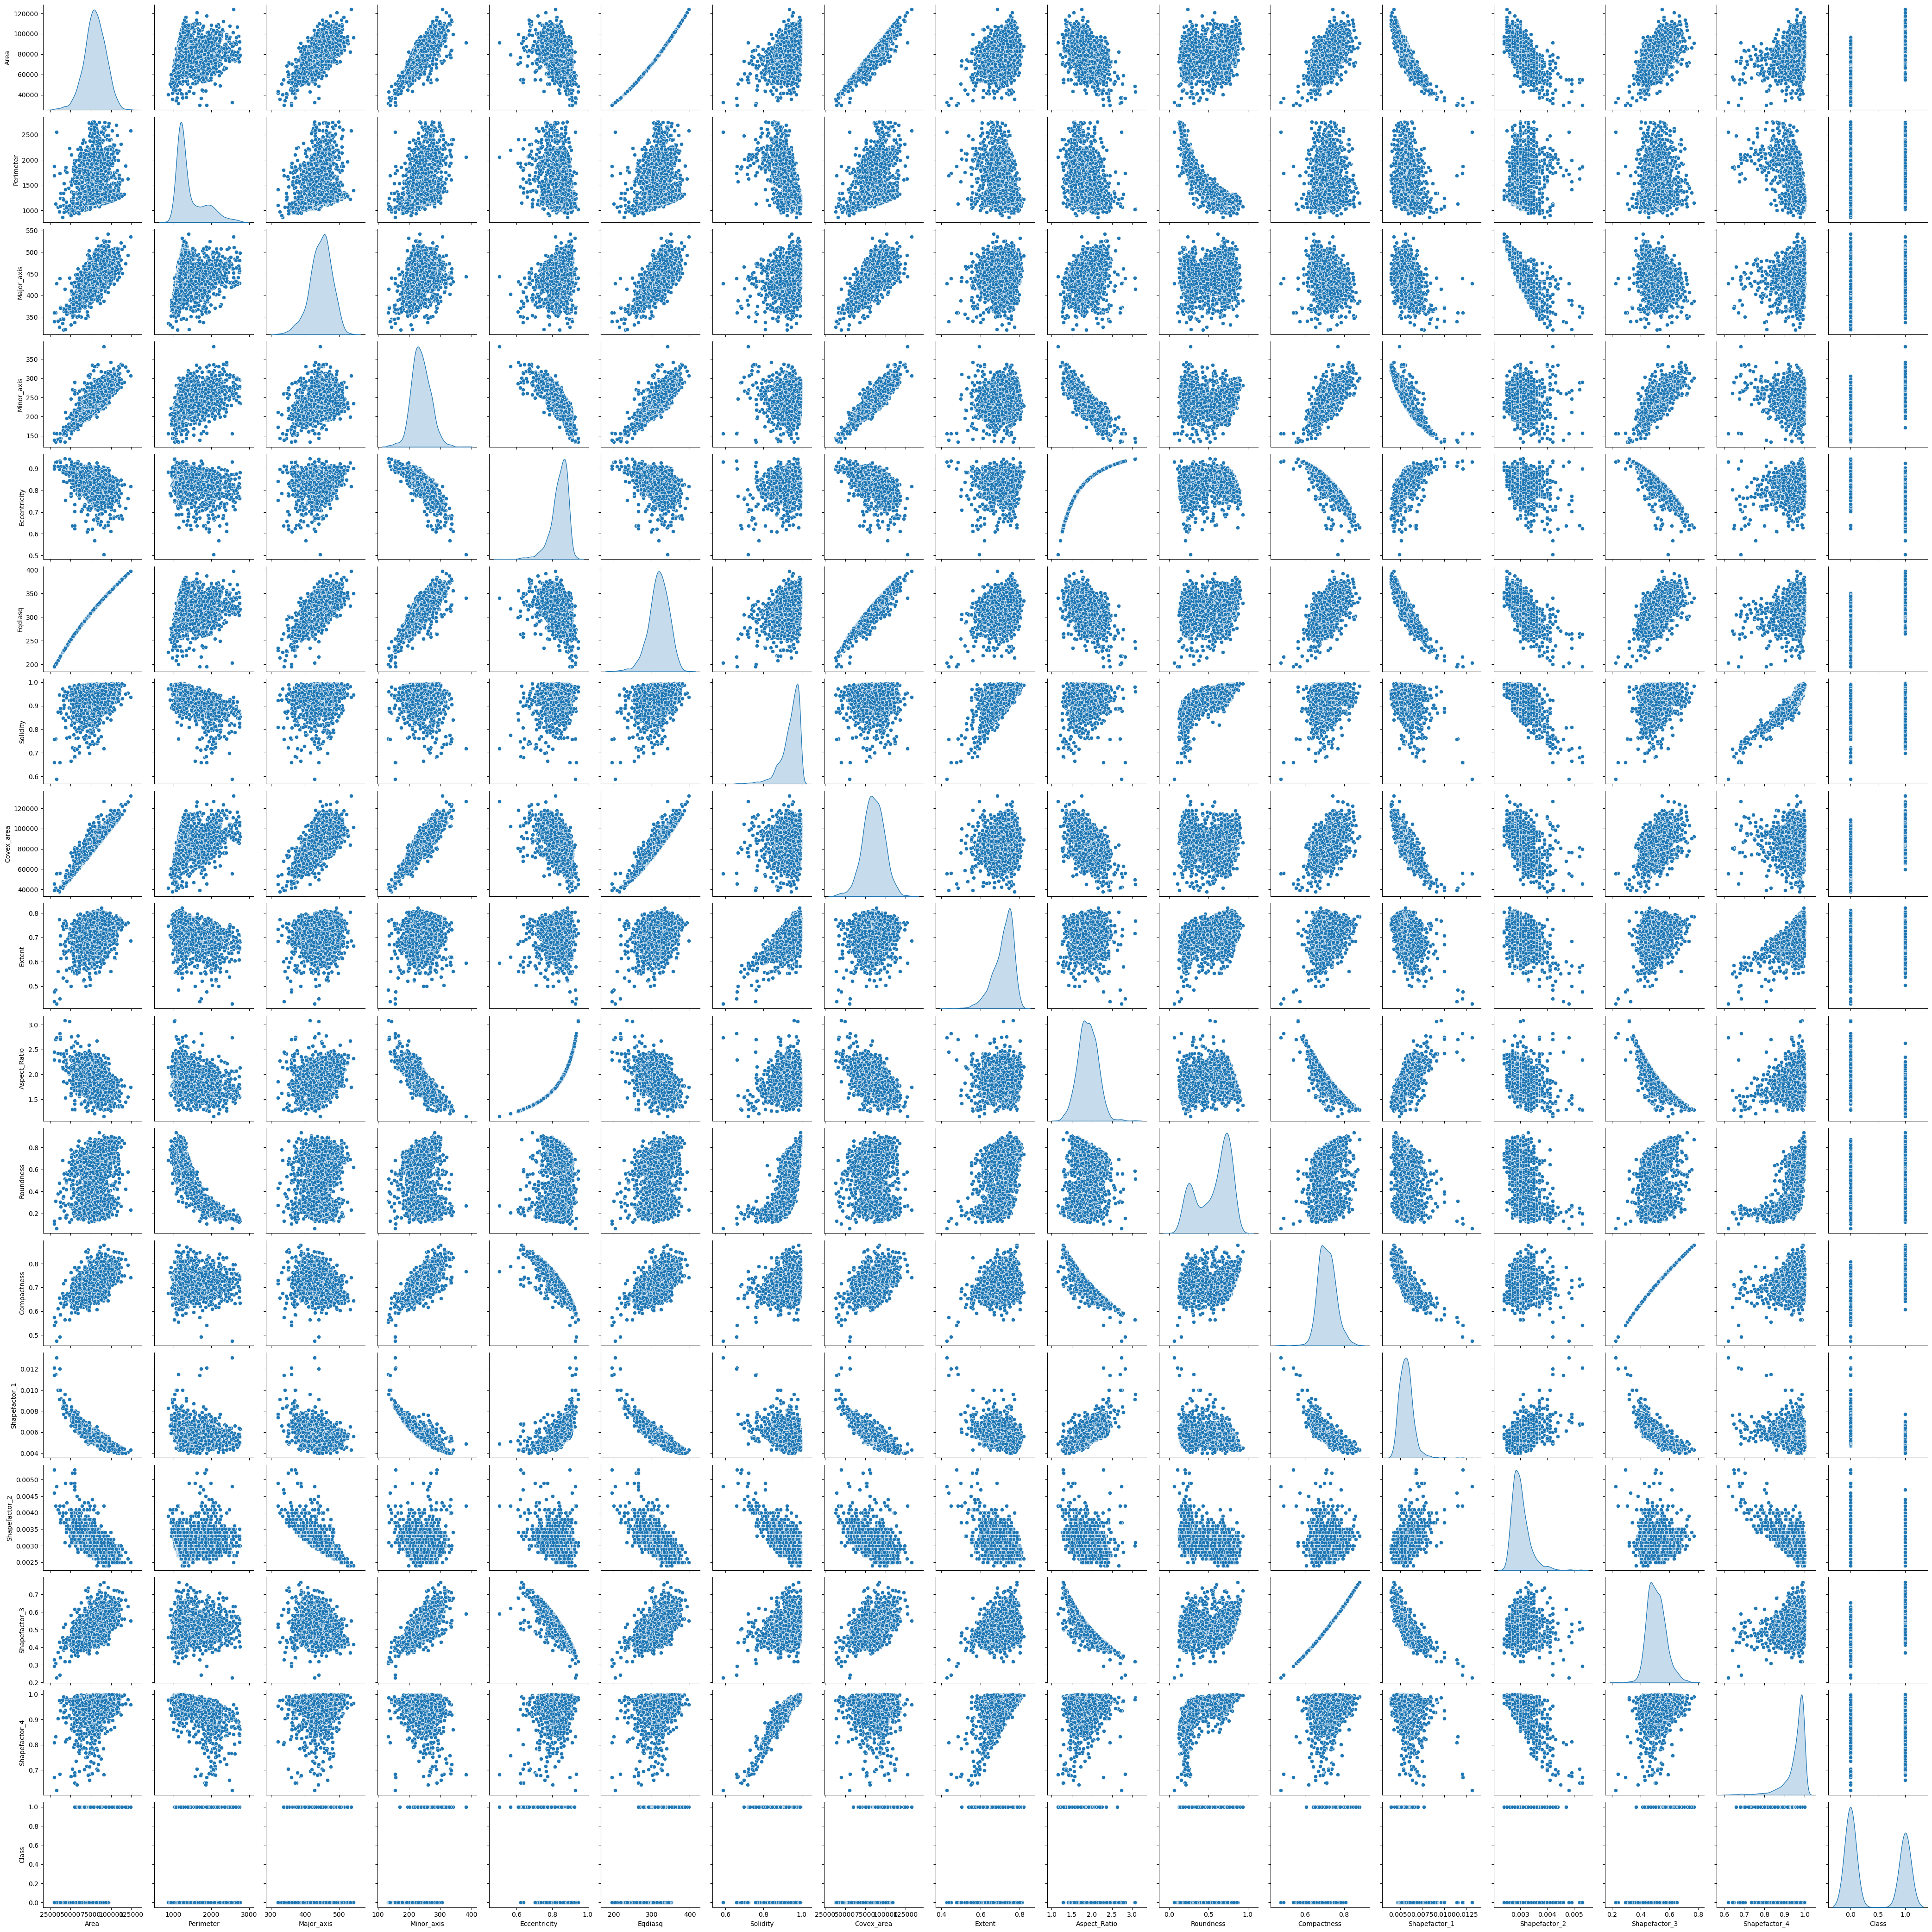

In [10]:
#Plot of features against each other
import seaborn as sns
sns.pairplot(df,diag_kind='kde')

In [11]:
#getting the correlation matrix of dataframe
df.corr()

Area  Perimeter  Major_axis  Minor_axis  Eccentricity  \
Area           1.000000   0.115941    0.697782    0.795881     -0.358892   
Perimeter      0.115941   1.000000    0.094296    0.390740     -0.334483   
Major_axis     0.697782   0.094296    1.000000    0.272578      0.298836   
Minor_axis     0.795881   0.390740    0.272578    1.000000     -0.816731   
Eccentricity  -0.358892  -0.334483    0.298836   -0.816731      1.000000   
Eqdiasq        0.997399   0.113631    0.705333    0.793155     -0.352723   
Solidity       0.363959  -0.671046    0.247822   -0.085556      0.257060   
Covex_area     0.943877   0.364474    0.661892    0.890003     -0.482713   
Extent         0.331784  -0.403916    0.186830    0.047442      0.080967   
Aspect_Ratio  -0.424025  -0.312373    0.265049   -0.839078      0.943751   
Roundness      0.250423  -0.891777    0.153592   -0.066594      0.171669   
Compactness    0.551711   0.044624   -0.201121    0.773512     -0.846851   
Shapefactor_1 -0.892493  -0.081031   -0.391310   -0.851167      0.580983   
Shapefactor_2 -0.652205   0.279590   -0.796526   -0.087657     -0.394392   
Shapefactor_3  0.545091   0.047527   -0.208956    0.771658     -0.855222   
Shapefactor_4  0.297043  -0.631700    0.201741   -0.181450      0.325602   
Class          0.589226   0.145290    0.136845    0.668126     -0.546759   

                Eqdiasq  Solidity  Covex_area    Extent  Aspect_Ratio  \
Area           0.997399  0.363959    0.943877  0.331784     -0.424025   
Perimeter      0.113631 -0.671046    0.364474 -0.403916     -0.312373   
Major_axis     0.705333  0.247822    0.661892  0.186830      0.265049   
Minor_axis     0.793155 -0.085556    0.890003  0.047442     -0.839078   
Eccentricity  -0.352723  0.257060   -0.482713  0.080967      0.943751   
Eqdiasq        1.000000  0.372779    0.940651  0.340073     -0.423318   
Solidity       0.372779  1.000000    0.042000  0.678599      0.177830   
Covex_area     0.940651  0.042000    1.000000  0.122881     -0.522637   
Extent         0.340073  0.678599    0.122881  1.000000      0.023303   
Aspect_Ratio  -0.423318  0.177830   -0.522637  0.023303      1.000000   
Roundness      0.254242  0.779134   -0.007125  0.512278      0.115896   
Compactness    0.549971  0.226165    0.515907  0.254064     -0.896857   
Shapefactor_1 -0.906893 -0.380619   -0.834649 -0.369237      0.677735   
Shapefactor_2 -0.665368 -0.727156   -0.447161 -0.510576     -0.315574   
Shapefactor_3  0.541747  0.215860    0.511311  0.245638     -0.892523   
Shapefactor_4  0.302469  0.949501   -0.017052  0.650896      0.250587   
Class          0.577300  0.125347    0.584618  0.100200     -0.581469   

               Roundness  Compactness  Shapefactor_1  Shapefactor_2  \
Area            0.250423     0.551711      -0.892493      -0.652205   
Perimeter      -0.891777     0.044624      -0.081031       0.279590   
Major_axis      0.153592    -0.201121      -0.391310      -0.796526   
Minor_axis     -0.066594     0.773512      -0.851167      -0.087657   
Eccentricity    0.171669    -0.846851       0.580983      -0.394392   
Eqdiasq         0.254242     0.549971      -0.906893      -0.665368   
Solidity        0.779134     0.226165      -0.380619      -0.727156   
Covex_area     -0.007125     0.515907      -0.834649      -0.447161   
Extent          0.512278     0.254064      -0.369237      -0.510576   
Aspect_Ratio    0.115896    -0.896857       0.677735      -0.315574   
Roundness       1.000000     0.171226      -0.257039      -0.484803   
Compactness     0.171226     1.000000      -0.801009       0.016562   
Shapefactor_1  -0.257039    -0.801009       1.000000       0.467270   
Shapefactor_2  -0.484803     0.016562       0.467270       1.000000   
Shapefactor_3   0.165476     0.998625      -0.786927       0.027550   
Shapefactor_4   0.687658     0.181952      -0.305041      -0.730268   
Class           0.105768     0.624939      -0.615513      -0.126188   

               Shapefactor_3  Shapefactor_4     Class  


In [12]:
df.corr().round(2).style.background_gradient(cmap="viridis")

In [13]:
#representing the correlation in form of heat map
sns.heatmap(df.corr())

<Axes: >

# Methodology

1. Using libraries

Initially, the dataset is prepared by splitting it into training and testing sets, and the input features are standardized using `StandardScaler`. The Perceptron model is then initialized and trained on the training data over 100 epochs with a random seed set for reproducibility. After training, the model makes predictions on the test data, and the accuracy of the model is evaluated by comparing the predicted values with the actual target values. 

To assess the model's performance visually, two plots are generated. The first plot showcases the comparison between the actual target values and the predicted values from the Perceptron model. It uses a scatter plot where each point represents a data instance, with the x-coordinate indicating the actual target value and the y-coordinate indicating the predicted value. Additionally, a diagonal dashed line is included to represent perfect predictions where the actual and predicted values align. 

In the second plot, the test data points are visualized in a scatter plot where the colors correspond to the predictions made by the Perceptron model. This visualization aids in understanding how well the model differentiates between the classes in the dataset. 

2. From scratch

The Perceptron class is defined with methods for model initialization, linear transformation, activation function (Heaviside step function), prediction, loss calculation, and training. The Perceptron model is trained on a dataset split into training and testing sets, with the input features standardized for consistency using StandardScaler. The model is then trained on the training data over a specified number of epochs, where the weights are updated based on predictions and target values.

Following the training process, predictions are made on the test data, and the accuracy of the model is evaluated by comparing the predicted values with the actual target values. The accuracy metric provides insight into the performance of the trained Perceptron model on unseen data. Additionally, a scatter plot is generated to visualize the test dataset, with points colored based on the model's predictions. This visualization helps in understanding how well the Perceptron model separates the classes in the dataset based on the provided features. 

### Using library

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron

X = df.drop('Class', axis=1).values
y = df['Class'].values

# Split the dataset into training and testing sets, scale the input features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set the random seed legacy
np.random.seed(23)

# Initialize the Perceptron with the max_iter parameter set to 100
perceptron = Perceptron(max_iter=100)

# Train the Perceptron on the training data
perceptron.fit(X_train, y_train)

# Make predictions on the test data
pred = perceptron.predict(X_test)

# Evaluate the accuracy of the trained Perceptron model on the test data
accuracy = np.mean(pred == y_test)
print("Accuracy:", accuracy)


Accuracy: 0.8930232558139535


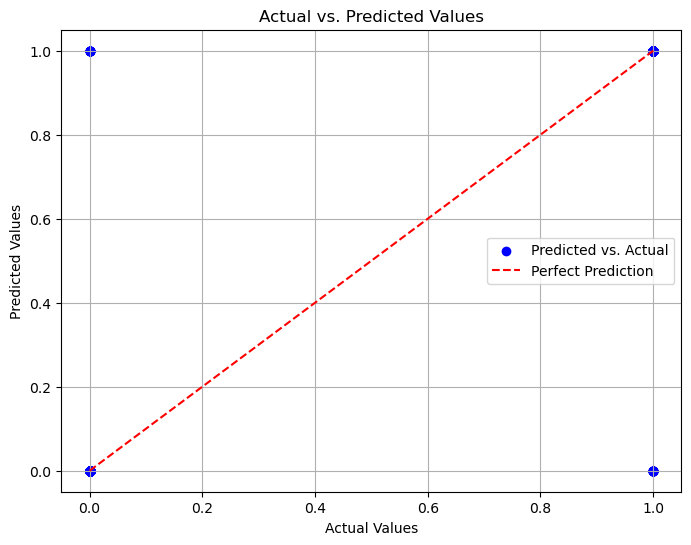

In [15]:
import matplotlib.pyplot as plt

# Predicted values
predicted_values = perceptron.predict(X_test)

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_values, color='blue', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

The x-axis represents the actual values and the y-axis represents the predicted values. The red dashed line labeled “Perfect Prediction” represents an ideal scenario where the predicted values exactly match the actual values. The blue dots represent individual data points of predicted versus actual values.

From the plot, the predictions are quite accurate as the blue dots are very close to the red dashed line.

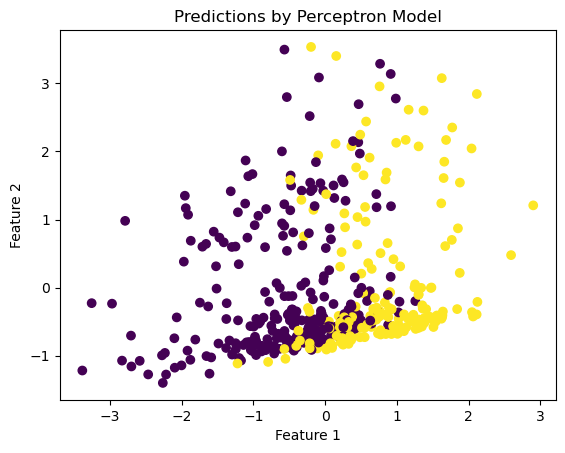

In [16]:
import matplotlib.pyplot as plt

# Plot the dataset with predictions
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Predictions by Perceptron Model')
plt.show()

### From scratch 

In [17]:
# Import the necessary library
import numpy as np
 
# Build the Perceptron Model
class Perceptron:
     
    def __init__(self, num_inputs, learning_rate=0.01):
        # Initialize the weight and learning rate
        self.weights = np.random.rand(num_inputs + 1)
        self.learning_rate = learning_rate
     
    # Define the first linear layer 
    def linear(self, inputs):
        Z = inputs @ self.weights[1:].T + + self.weights[0]
        return Z
     
    # Define the Heaviside Step function.
    def Heaviside_step_fn(self, z):
        if z >= 0:
            return 1
        else:
            return 0
         
    # Define the Prediction
    def predict(self, inputs):
        Z = self.linear(inputs)
        try:
            pred = []
            for z in Z:
                pred.append(self.Heaviside_step_fn(z))
        except:
            return self.Heaviside_step_fn(Z)
        return pred
     
    # Define the Loss function
    def loss(self, prediction, target):
        loss = (prediction-target)
        return loss
     
    #Define training
    def train(self, inputs, target):
        prediction = self.predict(inputs)
        error = self.loss(prediction, target)
        self.weights[1:] += self.learning_rate * error * inputs
        self.weights[0]  += self.learning_rate * error
         
    # Fit the model
    def fit(self, X, y, num_epochs):
        for epoch in range(num_epochs):
            for inputs, target in zip(X, y):
                self.train(inputs, target)

Accuracy: 0.872093023255814


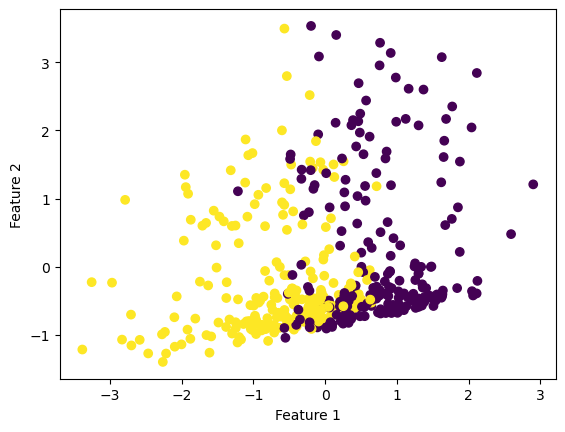

In [18]:
# Import the necessary library
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = df.drop('Class', axis=1).values  # Drop 'is_genuine' column and get values
y = df['Class'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=23,
                                                    shuffle=True
                                                   )
 
# Scale the input features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
 
# Set the random seed legacy
np.random.seed(23)
 
# Initialize the Perceptron with the appropriate number of inputs
perceptron = Perceptron(num_inputs=X_train.shape[1])
 
# Train the Perceptron on the training data
perceptron.fit(X_train, y_train, num_epochs=100)
 
# Prediction
pred = perceptron.predict(X_test)
 
# Test the accuracy of the trained Perceptron on the testing data
accuracy = np.mean(pred != y_test)
print("Accuracy:", accuracy)
 
# Plot the dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# c) Multi layer perceptron for multi class classifier

# Dataset description
The dataset is related to red variants of the Portuguese "Vinho Verde" wine. 

<b> Independent variables </b>

1. Fixed acidity: predominant fixed acids found in wines are tartaric, malic, citric, and succinic.</ul>

2. Volatile acidity: measure of the low molecular weight (or steam distillable) fatty acids in wine. generally perceived as the odour of vinegar.

3. Citric acid: a weak organic acid, which is often used as a natural preservative or additive to food or drink to add a sour taste to food. Can be added to finished wines to increase acidity and give a “fresh" flavor.

4. Chlorides: give the wine a salty flavor, which may turn away some customers

5. Free sulfur dioxide: an essential winemaking additive that has the dual properties of anti-oxidation and preservation.

6. Total sulfur dioxide: combination of 2 types of sulfur dioxide (SO2): free SO2 + active SO2

7. Density: mass per unit volume of wine

8. pH: a scale used to specify the acidity or basicity of an aqueous solution (lower pH indicates higher acidity).

9. Sulphates: a food preservative widely used in winemaking, thanks to their ability to maintain the flavor particularly associated with a long list of side effects related to wine consumption, including the dreaded wine-induced headache

10. Alcohol: an organic compound that carries at least one hydroxyl functional group (−OH) bound to a saturated carbon atom.

<b> Dependent variable </b>

1. Quality: score between 0 and 10. Based on sensory data, tasted and rated by wine experts

# Exploratory data analysis

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn  as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('winequality-red.csv')
df.head(20)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4             0.700         0.00             1.9      0.076   
1             7.8             0.880         0.00             2.6      0.098   
2             7.8             0.760         0.04             2.3      0.092   
3            11.2             0.280         0.56             1.9      0.075   
4             7.4             0.700         0.00             1.9      0.076   
5             7.4             0.660         0.00             1.8      0.075   
6             7.9             0.600         0.06             1.6      0.069   
7             7.3             0.650         0.00             1.2      0.065   
8             7.8             0.580         0.02             2.0      0.073   
9             7.5             0.500         0.36             6.1      0.071   
10            6.7             0.580         0.08             1.8      0.097   
11            7.5             0.500         0.36             6.1      0.071   
12            5.6             0.615         0.00             1.6      0.089   
13            7.8             0.610         0.29             1.6      0.114   
14            8.9             0.620         0.18             3.8      0.176   
15            8.9             0.620         0.19             3.9      0.170   
16            8.5             0.280         0.56             1.8      0.092   
17            8.1             0.560         0.28             1.7      0.368   
18            7.4             0.590         0.08             4.4      0.086   
19            7.9             0.320         0.51             1.8      0.341   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58   
4                  11.0                  34.0   0.9978  3.51       0.56   
5                  13.0                  40.0   0.9978  3.51       0.56   
6                  15.0                  59.0   0.9964  3.30       0.46   
7                  15.0                  21.0   0.9946  3.39       0.47   
8                   9.0                  18.0   0.9968  3.36       0.57   
9                  17.0                 102.0   0.9978  3.35       0.80   
10                 15.0                  65.0   0.9959  3.28       0.54   
11                 17.0                 102.0   0.9978  3.35       0.80   
12                 16.0                  59.0   0.9943  3.58       0.52   
13                  9.0                  29.0   0.9974  3.26       1.56   
14                 52.0                 145.0   0.9986  3.16       0.88   
15                 51.0                 148.0   0.9986  3.17       0.93   
16                 35.0                 103.0   0.9969  3.30       0.75   
17                 16.0                  56.0   0.9968  3.11       1.28   
18                  6.0                  29.0   0.9974  3.38       0.50   
19                 17.0                  56.0   0.9969  3.04       1.08   

    alcohol  quality  
0       9.4        5  
1       9.8        5  
2       9.8        5  
3       9.8        6  
4       9.4        5  
5       9.4        5  
6       9.4        5  
7      10.0        7  
8       9.5        7  
9      10.5        5  
10      9.2        5  
11     10.5        5  
12      9.9        5  
13      9.1        5  
14      9.2        5  
15      9.2        5  
16     10.5        7  
17      9.3        5  
18      9.0        4  
19      9.2        6

In [2]:
df.shape #get the shape of dataframe created

(1599, 12)

In [3]:
df.isna().sum() #check the number of missing values in each column

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)
df[categorical].head()

There are 0 categorical variables

The categorical variables are :

 []


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

<Axes: xlabel='quality', ylabel='Count'>

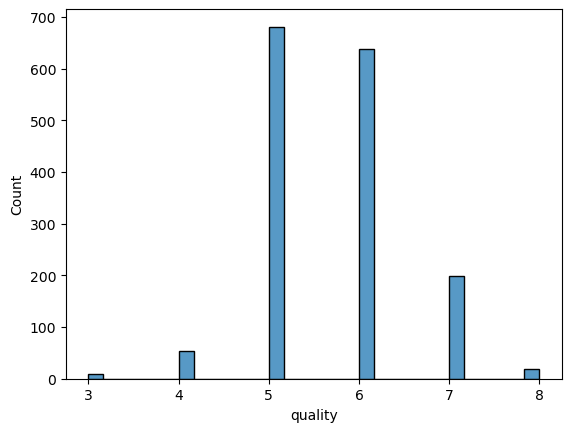

In [5]:
sns.histplot(df['quality'])

## Preprocessing

In [6]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

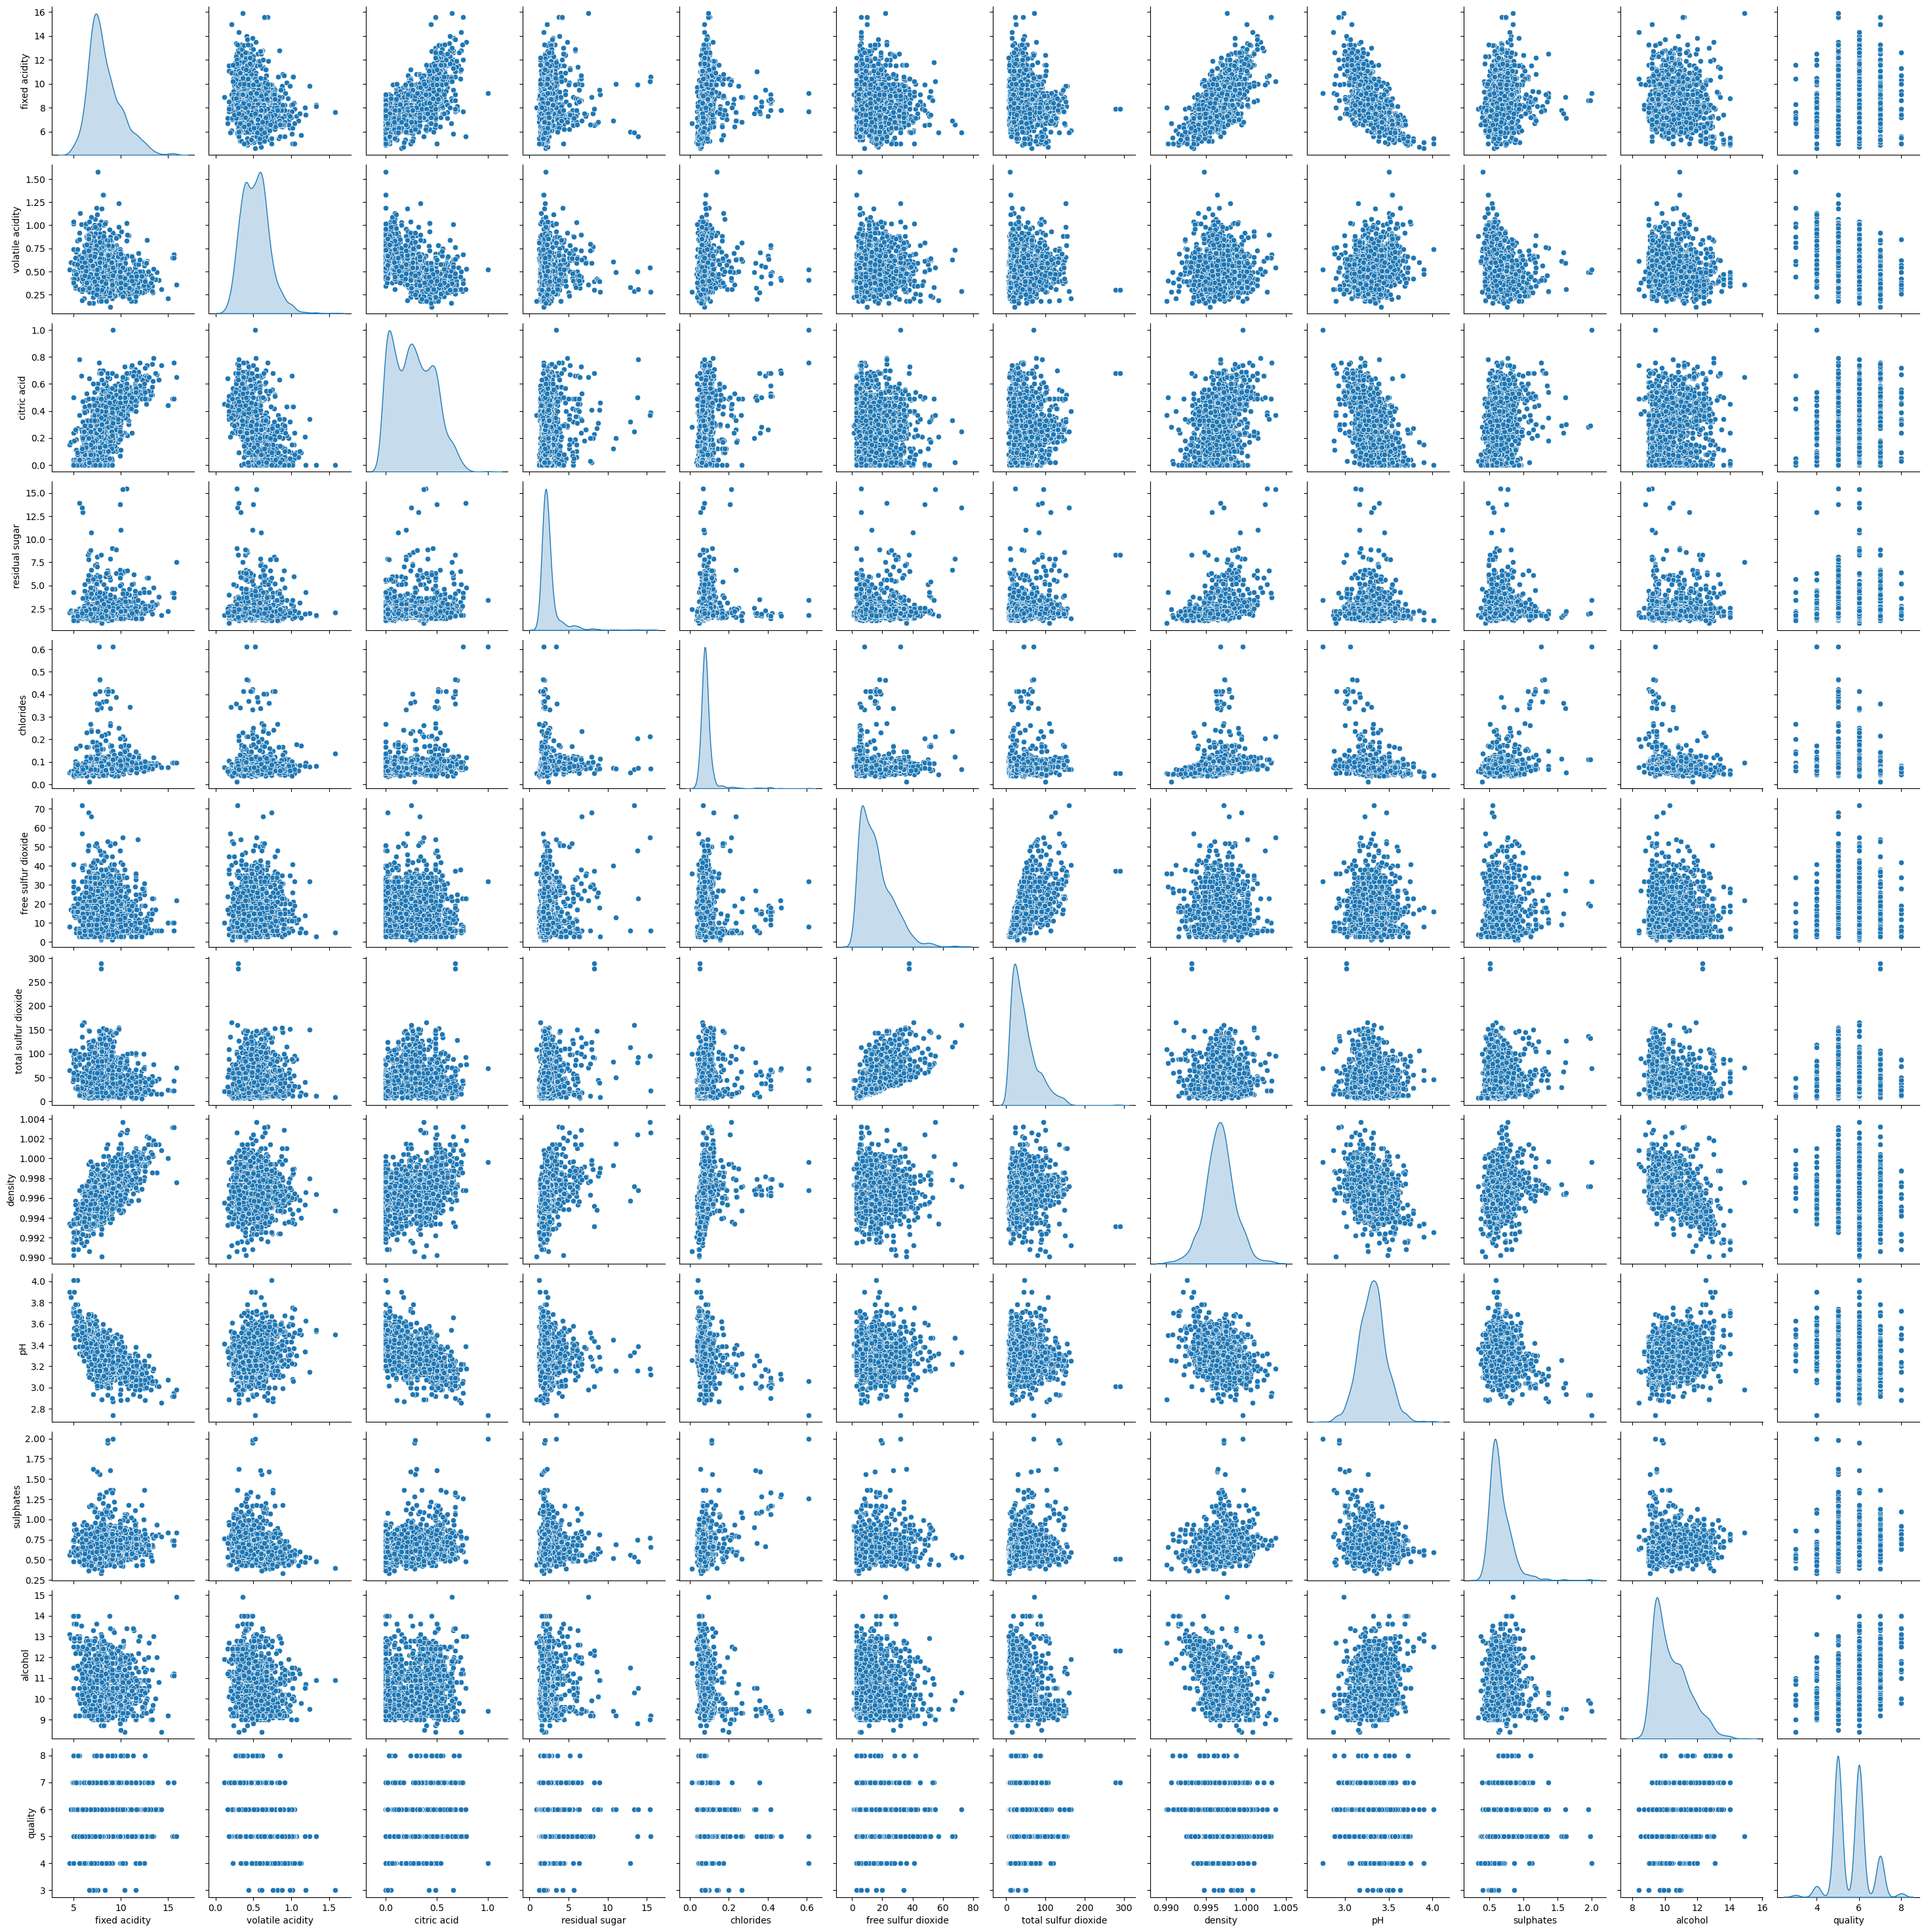

In [9]:
#Plot of features against each other
import seaborn as sns
sns.pairplot(df,diag_kind='kde')

In [10]:
#getting the correlation matrix of dataframe
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

In [11]:
df.corr().round(2).style.background_gradient(cmap="viridis")

<Axes: >

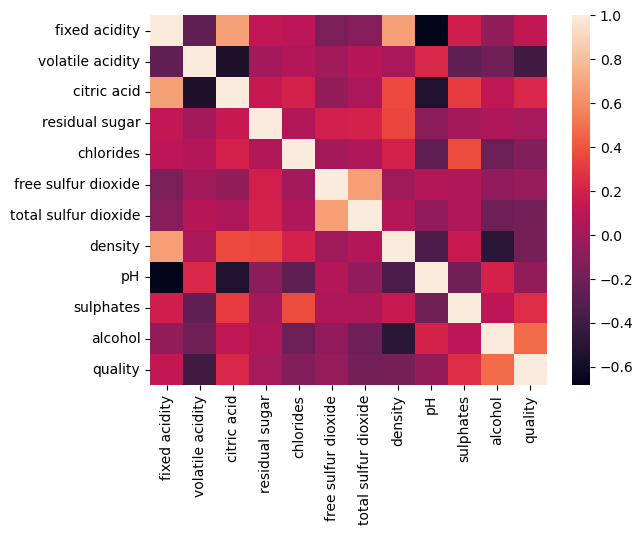

In [12]:
#representing the correlation in form of heat map
sns.heatmap(df.corr())

# Methodology

1) Data Preprocessing:

Split the dataset into independent variables (features) and the dependent variable (quality score).
Split the data into training and testing sets using train_test_split.
Scaled the independent variables using MinMaxScaler.

2) Model Training and Evaluation:

Trained multiple MLPClassifier models with different configurations (varied hidden layer sizes and maximum iterations).
Made predictions on the test set for each model.
Calculated evaluation metrics such as accuracy, precision, recall, and F1 score using accuracy_score, precision_score, recall_score, and f1_score.

3) Results:

Compared the performance of each model based on the evaluation metrics.
Evaluated the prediction results by comparing the predicted values with the actual values from the test set.

4) Model Methodology:

Utilized MLPClassifier models with varying hidden layer sizes and maximum iterations to capture different levels of complexity in the data.
Adjusted the hyperparameters to find a balance between model complexity and convergence.
Evaluated the models based on standard classification metrics to assess their predictive performance on the quality scores.

By following this methodology, we will effectively train and evaluate multiple MLPClassifier models on the wine dataset to predict the quality scores. The comparison of model performance based on different configurations will provide insights into how well each model generalizes to unseen data and helps in selecting the best model for predicting wine quality.


In [13]:
from sklearn.model_selection import train_test_split
Y = df['quality']
X = df.drop(columns=['quality'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (1279, 11)
Y train shape:  (1279,)
X test shape:  (320, 11)
Y test shape:  (320,)


In [14]:
# scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# In scikit-learn's MLPClassifier, the parameter max_iter specifies the maximum number of iterations (epochs) taken for the solvers to converge. By setting a higher value for max_iter, we can effectively allow the model to train for more epochs until convergence or until the specified maximum number of iterations is reached

# For Epoch =1000,Hidden layers (100,100,100)

In [17]:
from sklearn.neural_network import MLPClassifier

# We define the model
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=1000, random_state=42)

# We train model
mlp.fit(X_train, Y_train)


# We predict target values
prediction = mlp.predict(X_test[[0]]) 
actual_value = Y_test.iloc[0]

print("Predicted Value:", prediction)
print("Actual Value:", actual_value)

Predicted Value: [6]
Actual Value: 6


In [18]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

y_pred1 = mlp.predict(X_test)
accuracy1 = accuracy_score(Y_test, y_pred1)
precision1 = precision_score(Y_test, y_pred1, average='weighted')
recall1 = recall_score(Y_test, y_pred1, average='weighted')
f1score1 = f1_score(Y_test, y_pred1, average='weighted')

print(f"Accuracy: {accuracy1 * 100:.2f}%")
print(f"Precision = {precision1 * 100:.2f}%")
print(f"Recall = {recall1* 100:.2f}%")
print(f"F1 Score = {f1score1 * 100:.2f}%")

Accuracy: 56.25%
Precision = 58.11%
Recall = 56.25%
F1 Score = 56.76%


# For Epoch =750,Hidden layers (100)

In [21]:
# We define the model
mlp2 = MLPClassifier(hidden_layer_sizes=(100),max_iter=50, random_state=42)

# We train model
mlp2.fit(X_train, Y_train)


# We predict target values
prediction = mlp2.predict(X_test[[0]]) 
actual_value = Y_test.iloc[0]

print("Predicted Value:", prediction)
print("Actual Value:", actual_value)

Predicted Value: [6]
Actual Value: 6


In [22]:
y_pred2 = mlp2.predict(X_test)
accuracy2 = accuracy_score(Y_test, y_pred2)
precision2 = precision_score(Y_test, y_pred2, average='weighted')
recall2 = recall_score(Y_test, y_pred2, average='weighted')
f1score2 = f1_score(Y_test, y_pred2, average='weighted')

print(f"Accuracy: {accuracy2 * 100:.2f}%")
print(f"Precision = {precision2 * 100:.2f}%")
print(f"Recall = {recall2* 100:.2f}%")
print(f"F1 Score = {f1score2 * 100:.2f}%")

Accuracy: 58.75%
Precision = 57.31%
Recall = 58.75%
F1 Score = 57.76%


# For Epoch = 500,Hidden layers (100,100)

In [23]:
# We define the model
mlp3= MLPClassifier(hidden_layer_sizes=(100),max_iter=500, random_state=42)

# We train model
mlp3.fit(X_train, Y_train)


# We predict target values
prediction = mlp3.predict(X_test[[0]]) 
actual_value = Y_test.iloc[0]



print("Predicted Value:", prediction)
print("Actual Value:", actual_value)

Predicted Value: [6]
Actual Value: 6


In [24]:
y_pred3 = mlp3.predict(X_test)
accuracy3 = accuracy_score(Y_test, y_pred3)
precision3 = precision_score(Y_test, y_pred3, average='weighted')
recall3 = recall_score(Y_test, y_pred3, average='weighted')
f1score3 = f1_score(Y_test, y_pred3, average='weighted')

print(f"Accuracy: {accuracy3 * 100:.2f}%")
print(f"Precision = {precision3 * 100:.2f}%")
print(f"Recall = {recall3* 100:.2f}%")
print(f"F1 Score = {f1score3 * 100:.2f}%")

Accuracy: 60.31%
Precision = 58.91%
Recall = 60.31%
F1 Score = 59.58%


# For Epoch =1000,Hidden layers (100,100)

In [28]:
# We define the model
mlp4= MLPClassifier(hidden_layer_sizes=(100,100),max_iter=1000, random_state=42)

# We train model
mlp4.fit(X_train, Y_train)

# We predict target values
prediction = mlp4.predict(X_test[[0]]) 
actual_value = Y_test.iloc[0]


print("Predicted Value:", prediction)
print("Actual Value:", actual_value)

Predicted Value: [7]
Actual Value: 6


In [26]:
y_pred4 = mlp4.predict(X_test)
accuracy4 = accuracy_score(Y_test, y_pred4)
precision4 = precision_score(Y_test, y_pred4, average='weighted')
recall4 = recall_score(Y_test, y_pred4, average='weighted')
f1score4 = f1_score(Y_test, y_pred4, average='weighted')

print(f"Accuracy: {accuracy4 * 100:.2f}%")
print(f"Precision = {precision4 * 100:.2f}%")
print(f"Recall = {recall4* 100:.2f}%")
print(f"F1 Score = {f1score4 * 100:.2f}%")

Accuracy: 61.25%
Precision = 61.86%
Recall = 61.25%
F1 Score = 60.91%


# For Epoch =1000,Hidden layers (100)

In [29]:
# We define the model
mlp5= MLPClassifier(hidden_layer_sizes=(100),max_iter=1000, random_state=42)

# We train model
mlp5.fit(X_train, Y_train)


# We predict target values
prediction = mlp5.predict(X_test[[0]]) 
actual_value = Y_test.iloc[0]


print("Predicted Value:", prediction)
print("Actual Value:", actual_value)

Predicted Value: [6]
Actual Value: 6


In [30]:
y_pred5 = mlp5.predict(X_test)
accuracy5 = accuracy_score(Y_test, y_pred5)
precision5 = precision_score(Y_test, y_pred5, average='weighted')
recall5 = recall_score(Y_test, y_pred5, average='weighted')
f1score5 = f1_score(Y_test, y_pred5, average='weighted')

print(f"Accuracy: {accuracy5 * 100:.2f}%")
print(f"Precision = {precision5 * 100:.2f}%")
print(f"Recall = {recall5* 100:.2f}%")
print(f"F1 Score = {f1score5 * 100:.2f}%")

Accuracy: 61.88%
Precision = 60.86%
Recall = 61.88%
F1 Score = 61.26%


Comapred to all the models before, this one gives better accuracy on our datset therefore we will take this as our final model

# Result Analysis

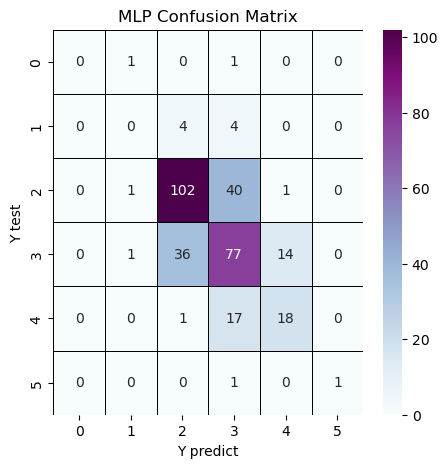

In [31]:
mlp_cm = confusion_matrix(Y_test, y_pred5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mlp_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('MLP Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

The rows represent the actual classes (Y test) while the columns represent the predicted classes (Y predict).
The diagonal elements represent the number of correct predictions for each class.
Off-diagonal elements indicate misclassifications where the actual class and predicted class do not match.
Here is the breakdown based on the provided confusion matrix:

1) For class 0:
The model made 80 correct predictions for class 0 (True Negatives).
There were 20 instances of class 0 incorrectly predicted as class 1 (False Positives).

2) For class 1:
The model correctly predicted all instances of class 1 (True Positives) as there are zeros in the row for class 1.

3) For class 2:
The model made 36 correct predictions for class 2 (True Negatives).
There were 40 instances of class 2 incorrectly predicted as class 0 (False Positives).

3) For class 3:
The model correctly predicted all instances of class 3 (True Positives) as there are zeros in the row for class 3.

4) For class 4:
The model correctly predicted all instances of class 4 (True Positives) as there are zeros in the row for class 4.

In [34]:
import pandas as pd

# Define the results for each model
results = {
    'Model': ['Model 1', 'Model 2', 'Model 3','Model 4','Model 5'],
    'Epoch': ['1000','750','500','1000','1000'],
    'Hidden Layers': ['(100,100,100)','(100)','(100,100)','(100,100)','(100)'],
    'Accuracy': [accuracy1, accuracy2, accuracy3,accuracy4,accuracy5],
    'Precision': [precision1, precision2, precision3,precision4,precision5],
    'Recall': [recall1, recall2, recall3,recall4,recall5],
    'F1 Score': [f1score1, f1score2, f1score3,f1score4,f1score5]
}

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the comparison table
print(results_df)


     Model Epoch  Hidden Layers  Accuracy  Precision    Recall  F1 Score
0  Model 1  1000  (100,100,100)  0.562500   0.581149  0.562500  0.567579
1  Model 2   750          (100)  0.587500   0.573147  0.587500  0.577587
2  Model 3   500      (100,100)  0.603125   0.589065  0.603125  0.595786
3  Model 4  1000      (100,100)  0.612500   0.618587  0.612500  0.609103
4  Model 5  1000          (100)  0.618750   0.608593  0.618750  0.612574


# Conclusion

Based on the table, it can be concluded that Model 4, with 1000 epochs and a single hidden layer of 100 neurons, outperforms the other models in terms of accuracy, precision, recall, and F1 score. This suggests that a higher number of epochs and an appropriately complex neural network structure can lead to improved performance metrics.

# References 
https://www.geeksforgeeks.org/what-is-perceptron-the-simplest-artificial-neural-network/

https://www.kaggle.com/datasets/belikesaif/16-attribute-pistachio-dataset

https://pyimagesearch.com/2021/05/06/implementing-the-perceptron-neural-network-with-python/

https://www.kaggle.com/datasets/shilongzhuang/red-and-white-wine-quality?resource=download